# Sentiment Analysis

In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ETL

In [2]:
data = pd.read_csv('Fitoor_OST_comments.csv', error_bad_lines=False)

In [3]:
data.head()

,Name,Comment_text,Time,Likes,Reply Count
0,Arifa Jan,Feel ful song,2021-03-25T17:23:54Z,0,0
1,Shabe Noor,My fvt song...❤️,2021-03-25T17:01:42Z,0,0
2,meraj wajid,Pakistani singers ki awaz our bol. I just love...,2021-03-25T16:47:13Z,0,0
3,Aliya khan,"One of the most interesting serial ,drama is F...",2021-03-25T15:46:31Z,0,0
4,Daim Asif,My fav song,2021-03-25T15:14:44Z,0,0


In [4]:
# Install 'textblob' library for sentiment analysis
# !pip install textblob

In [5]:
from textblob import TextBlob

In [6]:
# Checking the polarit of a text
# Polarity is showing the positivity, negativity, and neutrality of the text provided
# +1 is more positive, -1 is more negative, and 0 is neutral 
TextBlob('Thank gosh, a place I can watch it without hav...	').sentiment.polarity

0.0

In [7]:
# Checking the data for empty values
data.isna().sum()

Name            0
Comment_text    0
Time            0
Likes           0
Reply Count     0
dtype: int64

In [ ]:
# Drop the empty values if any
# data.dropna(inplace=True)

In [ ]:
# And check the result
# data.isna().sum()

In [8]:
# Find the polarity of the 'Comment_text' column
polarity_data = []
for i in data['Comment_text']:
    polarity_data.append(TextBlob(i).sentiment.polarity)

In [9]:
# Define a new column named 'polarity_data' in data and assign the values of 'polarity_data'
data['polarity_data'] = polarity_data

In [10]:
data.head()

,Name,Comment_text,Time,Likes,Reply Count,polarity_data
0,Arifa Jan,Feel ful song,2021-03-25T17:23:54Z,0,0,0.0000
1,Shabe Noor,My fvt song...❤️,2021-03-25T17:01:42Z,0,0,0.0000
2,meraj wajid,Pakistani singers ki awaz our bol. I just love...,2021-03-25T16:47:13Z,0,0,0.3375
3,Aliya khan,"One of the most interesting serial ,drama is F...",2021-03-25T15:46:31Z,0,0,0.4750
4,Daim Asif,My fav song,2021-03-25T15:14:44Z,0,0,0.0000


## I) Positive Sentiment Analysis

In [11]:
# Extratct the comments whose polarity is 1
positive_polarity = data[data['polarity_data'] == 1]

In [12]:
positive_polarity.head()

,Name,Comment_text,Time,Likes,Reply Count,polarity_data
43,manpreet kaur,awesome song...,2021-03-24T17:23:04Z,1,0,1.0
58,kuch bhi,Dilnashee is very beautiful and preety 💞,2021-03-24T12:34:16Z,1,0,1.0
95,small aseel chicks,Pakistan sa zaida best song koi ni bna sakta a...,2021-03-23T19:07:13Z,3,1,1.0
146,Shahina Baig,Superb.,2021-03-22T21:13:58Z,0,0,1.0
166,Mahib Gujjar,Ost is awesome,2021-03-22T13:49:45Z,1,0,1.0


In [ ]:
# Install 'wordcloud' for visualization of text data
# !pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)

In [15]:
# Combine all positive comments to remove the extra white spaces
total_positive_comments = ' '.join(positive_polarity['Comment_text'])

In [16]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_positive_comments)

(-0.5, 999.5, 499.5, -0.5)

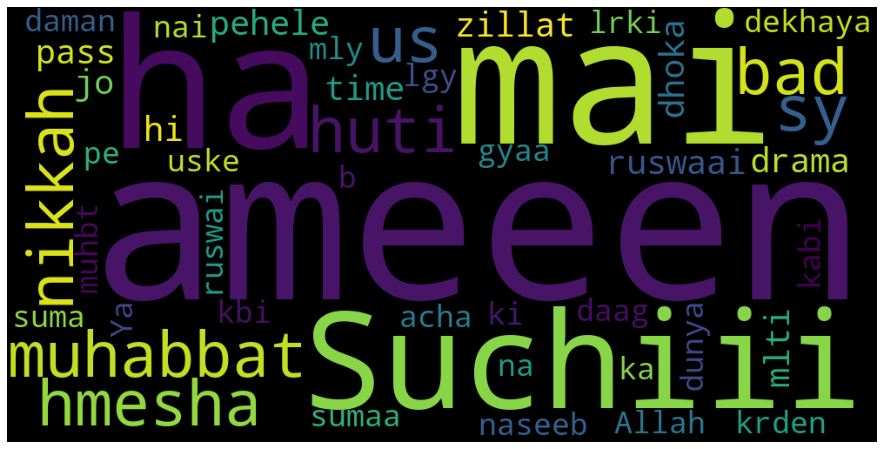

In [24]:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis('off')

## II) Negative Sentiment Analysis

In [19]:
negative_polarity = data[data['polarity_data'] == -1]

In [20]:
negative_polarity.head()

,Name,Comment_text,Time,Likes,Reply Count,polarity_data
1766,Vlogs with Maria,Suchiii muhabbat hmesha nikkah k bad huti ha ...,2021-02-25T14:15:58Z,3,1,-1.0


In [21]:
total_negative_comments = ' '.join(negative_polarity['Comment_text'])

In [22]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_negative_comments)

(-0.5, 999.5, 499.5, -0.5)

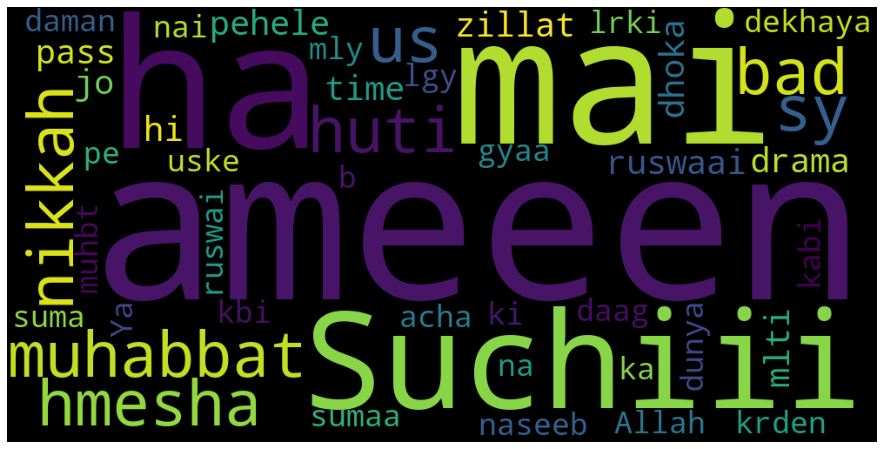

In [23]:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis('off')